# Experiment One Data Analysis
### By Xavier Moskala exm413@case.edu

In [45]:
# Importing modules needed for data analysis.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit,fmin
from scipy import signal as ss
import glob

In [46]:
# Make a list of lines on .spe files to be ignored
skip=[0,1,2,3,4,5,6,7,8,9,10,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074]

# Useful helper functions
## Reads multiple files
def read_multi_csv(start_sample,end_sample,path):     
    samples = list(range(start_sample,end_sample+1))     
    dfs = []
    for N in samples:
        if N <= 9:
            file = 'https://gitlab.com/xmoskala/srlab/-/raw/main/Compton'+path+"00"+str(N)+'.SPE'
        elif N <= 99:
            file = 'https://gitlab.com/xmoskala/srlab/-/raw/main/Compton'+path+"0"+str(N)+'.SPE'  
        else: 
            file = 'https://gitlab.com/xmoskala/srlab/-/raw/main/Compton'+path+str(N)+'.SPE'  
        file = file.replace(" ", "%20")
        #print (file)         
        df = pd.read_csv(file, skiprows=skip, header=0, names=["Data"])         
        dfs.append(df) 
    return dfs
## Averages the multiple files read
def aver(files):
    sample = files[0]
    for i in range(len(files)):
        sample = sample.add(files[i], axis=0)
    sample = sample.div(len(files)).add(0.5).astype(int)
    return sample
## Function to fix spaces in urls
def url(path):
    path = 'https://gitlab.com/xmoskala/srlab/-/raw/main/Compton'+path+'000.SPE'
    path = path.replace(" ", "%20")
    return path

In [95]:
# Read spectrum files (.spe) as .csv with pandas

## Number of samples to average through 
endnumber = 1

## Cs137 Readings
### Background
bgend = 10
BgFiles = read_multi_csv(0,bgend,"/1-25-23/Background/Background")    #Read files
Bg = aver(BgFiles)    #Average

### 0deg
deg0Files = read_multi_csv(0,endnumber,"/1-24-23/0deg/0deg")    #Read files
deg0 = aver(deg0Files) - Bg    #Average & subtract Bg

### 20deg
deg20Files = read_multi_csv(0,endnumber,"/1-24-23/20deg/20deg")    #Read files
deg20 = aver(deg20Files) - Bg     #Average & subtract Bg

### 30deg
deg30Files = read_multi_csv(0,endnumber,"/1-24-23/30deg/30deg")    #Read files
deg30 = aver(deg30Files) - Bg     #Average & subtract Bg

### 40deg
deg40Files = read_multi_csv(0,endnumber,"/1-24-23/40deg/40deg")    #Read files
deg40 = aver(deg40Files) - Bg     #Average & subtract Bg

### 60deg
deg60Files = read_multi_csv(0,endnumber,"/1-24-23/60deg/60deg")    #Read files
deg60 = aver(deg60Files) - Bg     #Average & subtract Bg

### 80deg
deg80Files = read_multi_csv(0,endnumber,"/1-24-23/80deg/80deg")    #Read files
deg80 = aver(deg80Files) - Bg     #Average & subtract Bg




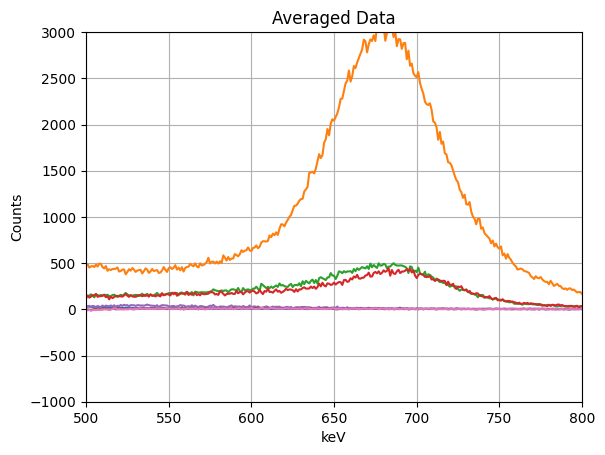

In [96]:
#Plot Background Data
Bin = 1 # Bin size from calibration on Maestro
x = np.arange(0,2048,Bin)[0:len(Bg)]

fig, ax = plt.subplots()
ax.plot(x, Bg, label="Bg")
ax.plot(x, deg0, label="0deg")
ax.plot(x, deg20, label="20deg")
ax.plot(x, deg30, label="30deg")
ax.plot(x, deg40, label="40deg")
ax.plot(x, deg60, label="60deg")
ax.plot(x, deg80, label="80deg")

#plt.xlim(0,Bin*len(Bg))
#plt.xlim(0,1670)
plt.xlim(500,800)
#plt.ylim(-1000,3000)
plt.ylim(-1000,3000)

ax.set(xlabel='keV', ylabel='Counts',
       title='Averaged Data')
ax.grid()
#ax.legend()



In [98]:
# Read spectrum files (.spe) as .csv with pandas

## Number of samples to average through 
endnumber = 1

## Cs137 Readings

### 0deg
deg0Files = read_multi_csv(0,endnumber,"/1-26-23/0deg/0deg")    #Read files
deg0 = aver(deg0Files) - Bg    #Average & subtract Bg

### 10deg
deg10Files = read_multi_csv(0,endnumber,"/1-26-23/10deg/10deg")    #Read files
deg10 = aver(deg10Files) - Bg     #Average & subtract Bg

### 20deg
deg20Files = read_multi_csv(0,endnumber,"/1-26-23/20deg/20deg")    #Read files
deg20 = aver(deg20Files) - Bg     #Average & subtract Bg

### 30deg
deg30Files = read_multi_csv(0,endnumber,"/1-26-23/30deg/30deg")    #Read files
deg30 = aver(deg30Files) - Bg     #Average & subtract Bg

### 40deg
deg40Files = read_multi_csv(0,endnumber,"/1-26-23/40deg/40deg")    #Read files
deg40 = aver(deg40Files) - Bg     #Average & subtract Bg

### 50deg
deg50Files = read_multi_csv(0,endnumber,"/1-26-23/50deg/50deg")    #Read files
deg50 = aver(deg50Files) - Bg     #Average & subtract Bg

### 60deg
deg60Files = read_multi_csv(0,endnumber,"/1-26-23/60deg/60deg")    #Read files
deg60 = aver(deg60Files) - Bg     #Average & subtract Bg

### 70deg
deg70Files = read_multi_csv(0,endnumber,"/1-26-23/70deg/70deg")    #Read files
deg70 = aver(deg70Files) - Bg     #Average & subtract Bg





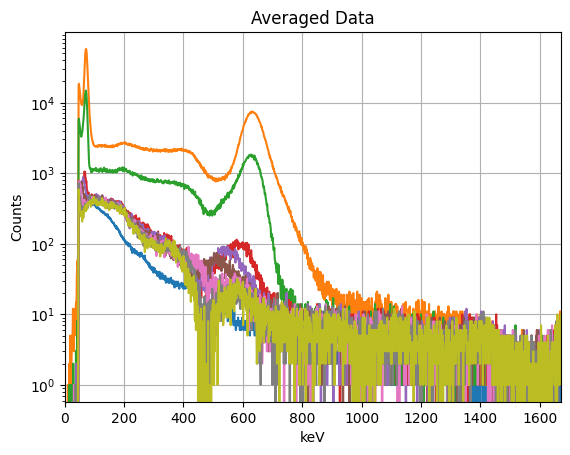

In [99]:
#Plot Background Data
Bin = 1 # Bin size from calibration on Maestro
x = np.arange(0,2048,Bin)[0:len(Bg)]

fig, ax = plt.subplots()
ax.semilogy(x, Bg, label="Bg")
ax.semilogy(x, deg0, label="0deg")
ax.plot(x, deg10, label="10deg")
ax.plot(x, deg20, label="20deg")
ax.plot(x, deg30, label="30deg")
ax.plot(x, deg40, label="40deg")
ax.plot(x, deg50, label="50deg")
ax.plot(x, deg60, label="60deg")
ax.plot(x, deg70, label="70deg")


#plt.xlim(0,Bin*len(Bg))
plt.xlim(0,1670)
#plt.xlim(400,700)
#plt.ylim(-1000,3000)
#plt.ylim(-1000,3000)

ax.set(xlabel='keV', ylabel='Counts',
       title='Averaged Data')
ax.grid()
#ax.legend()
